## Moving Average model

In [2]:
#import packages
import pandas as pd
from matplotlib import pyplot
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
from numpy import mean
from sklearn.metrics import mean_squared_error


In [3]:
#read dataset
apple_data=pd.read_csv('aapl.csv',index_col='Date',parse_dates=True,usecols=['Date','Close'])
apple_data.head()

,Close
Date,
2014-10-01,99.180000
2014-10-02,99.900002
2014-10-03,99.620003
2014-10-06,99.620003
2014-10-07,98.750000


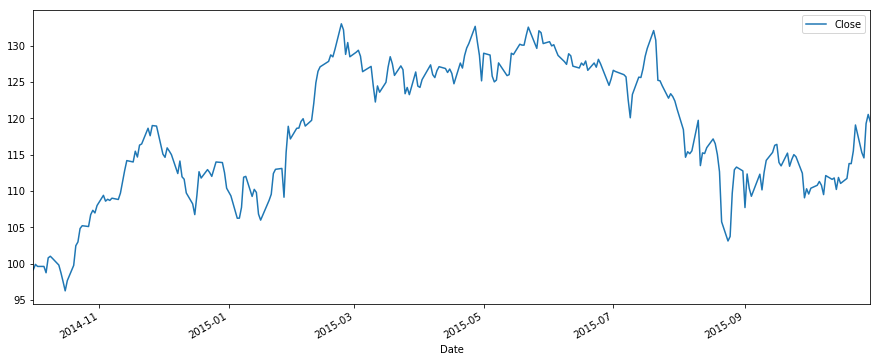

In [38]:
#plot the data
apple_data.plot()

pyplot.show()

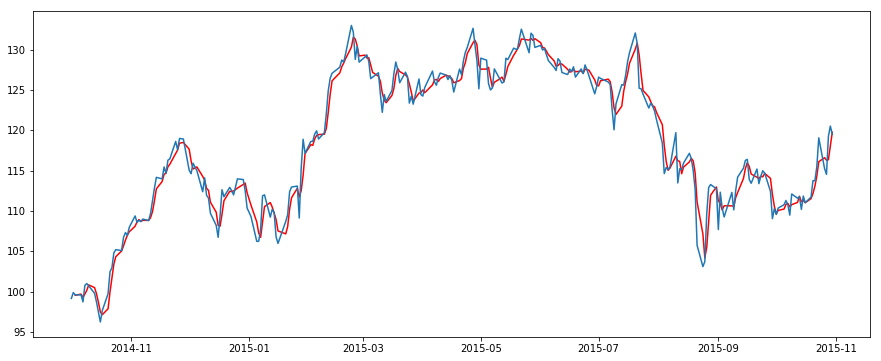

In [77]:
#cakcula
rolling=apple_data.rolling(window=3,center=False).mean()
pyplot.plot(rolling,color='red')
pyplot.plot(apple_data)
pyplot.show()

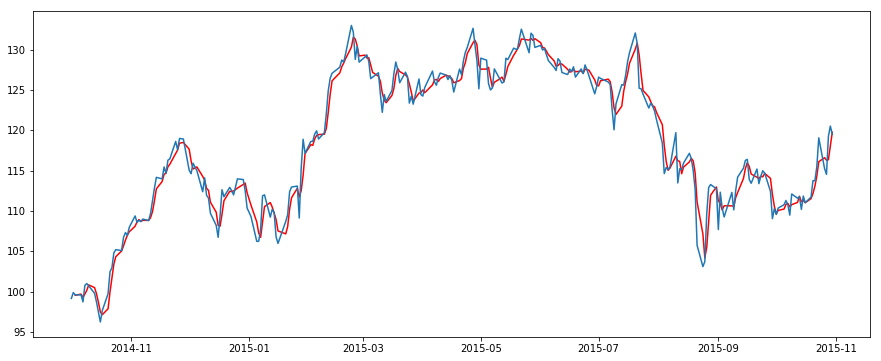

In [57]:
pyplot.plot(rolling,color='red')
pyplot.plot(apple_data)
pyplot.show()

In [60]:
rolling_100obs=rolling.head(100)
apple_data_100obs=apple_data.head(100)

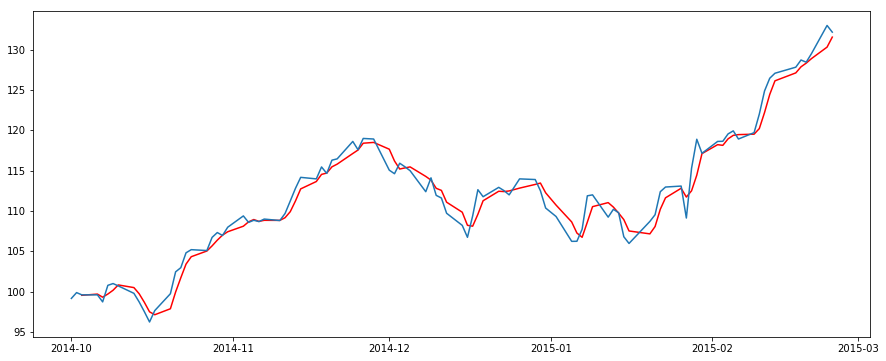

In [62]:
rolling_100obs=rolling.head(100)
apple_data_100obs=apple_data.head(100)
pyplot.plot(rolling_100obs,color='red')
pyplot.plot(apple_data_100obs)
pyplot.show()

In [74]:
X = apple_data.values
len(X)

274

Test MSE: 5.390


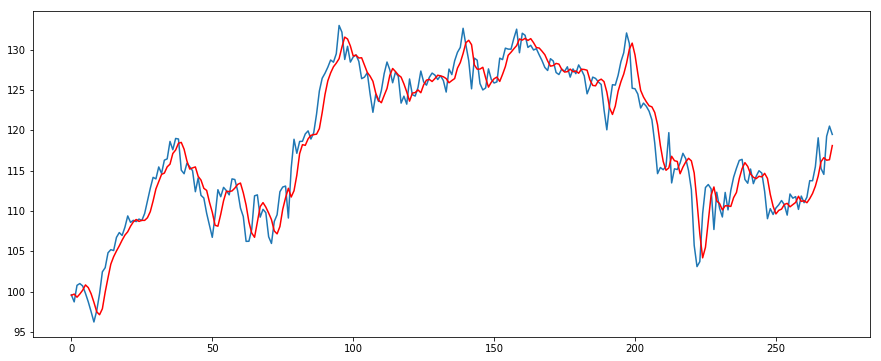

In [78]:

# prepare situation
X = apple_data.values
window = 3
history_obs = [X[i] for i in range(window)]
test_obs = [X[i] for i in range(window, len(X))]
predictions = list()
# walk forward over time steps in test
for t in range(len(test_obs)):
    length = len(history_obs)
    yhat = mean([history_obs[i] for i in range(length-window,length)])
    obs = test_obs[t]
    predictions.append(yhat)
    history_obs.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test_obs, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test_obs)
pyplot.plot(predictions, color='red')
pyplot.show()


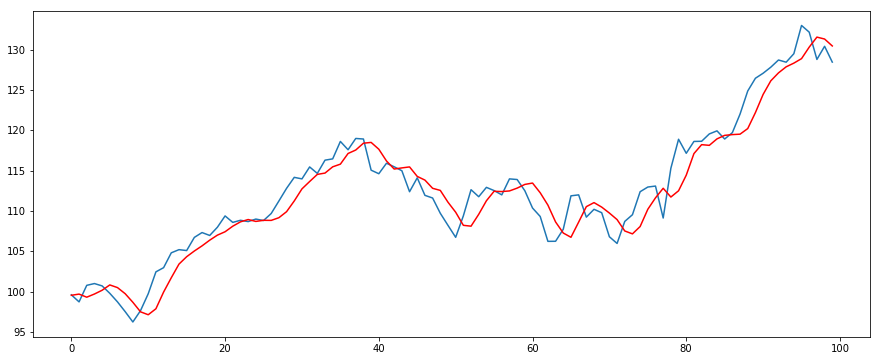

In [76]:
# zoom plot
pyplot.plot(test_obs[0:100])
pyplot.plot(predictions[0:100], color='red')
pyplot.show()